In [1]:
import random
import math

In [2]:
a = [
    random.randrange(0, 100)
    for _ in range(100)
]

In [3]:
len(a)

100

In [4]:
def average(l):
    return sum(l) / len(l)

average(a)

47.58

In [5]:
def median(l):
    l_sorted = sorted(l)
    inf = math.floor((len(l) + 1) / 2) - 1
    sup = math.ceil((len(l) + 1) / 2) - 1
    return (l_sorted[inf] + l_sorted[sup])/2

In [6]:
median(a)

46.0

In [7]:
median([0, 1, 2])

1.0

練習11 分散

In [8]:
def variance_population(l):
    x_bar = average(l)
    return sum([
        (x - x_bar)**2 for x in l
    ]) / len(l)

def variance_sample(l):
    x_bar = average(l)
    return sum([
        (x - x_bar)**2 for x in l
    ]) / (len(l) - 1)

variance = variance_population

In [9]:
variance([10, 12, 18, 34])

88.75

In [10]:
def stdev_population(l):
    return math.sqrt(variance_population(l))

def stdev_sample(l):
    return math.sqrt(variance_sample(l))

stdev = stdev_population

練習12 ベクトルの長さ

In [11]:
def v_length(v):
    return math.sqrt(sum([x**2 for x in v]))

In [12]:
v_length([10, 12, 18, 34])

41.52107898405339

練習13 ベクトルの距離

In [13]:
def v_distance(v1, v2):
    assert len(v1) == len(v2), "the two vectors must equal in length"
    return math.sqrt(sum([(x - y)**2 for x, y in zip(v1, v2)]))

In [14]:
v_distance([2, 3], [4, 5])

2.8284271247461903

練習14 ベクトルの内積

In [15]:
def v_dot(v1, v2):
    assert len(v1) == len(v2), "the two vectors must equal in length"
    return sum([x*y for x, y in zip(v1, v2)])

In [16]:
v_dot([2, 3], [4, 5])

23

練習15 共分散

In [17]:
# データセットをあらかじめ定義する
temperature_list = [12.1, 15.3, 18.6, 21.7, 26.1, 32.1]
sales_list = [45, 520, 2864, 6874, 25487, 102870]

In [18]:
def covariance(l, m):
    assert len(l) == len(m), "the two lists must equal in length"
    n = len(l)
    x_bar = average(l)
    y_bar = average(m)
    return sum([
        (x - x_bar) * (y - y_bar) for x, y in zip(l, m)
    ]) / n

In [19]:
covariance(temperature_list, sales_list)

211454.23333333337

練習16 相関係数

In [20]:
def correlation(l, m):
    assert len(l) == len(m), "the two lists must equal in length"
    return covariance(l, m) / (stdev(l) * stdev(m))

In [21]:
correlation(temperature_list, sales_list)

0.8633475827899139

練習17 散布図

In [22]:
import matplotlib.pyplot as plt

In [23]:
def scatter_plot(x, y, x_label="", y_label=""):
    plt.scatter(x, y)
    plt.xlabel(x_label)
    plt.ylabel(y_label)

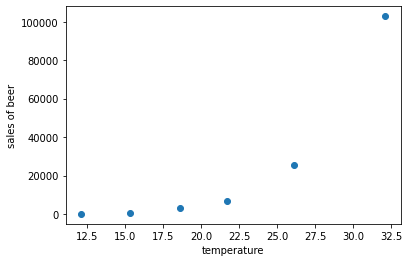

In [24]:
scatter_plot(
    temperature_list,
    sales_list,
    x_label="temperature",
    y_label="sales of beer",
)

In [25]:
log_sales_list = [math.log(x) for x in sales_list]

In [26]:
correlation(temperature_list, log_sales_list)

0.969301464633746

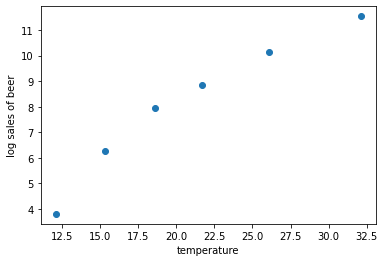

In [27]:
scatter_plot(
    temperature_list,
    log_sales_list,
    x_label="temperature",
    y_label="log sales of beer",
)

練習18 スピアマンの順位相関

In [28]:
def spearman(l, m):
    assert len(l) == len(m), "the two lists must equal in length"
    n = len(l)
    return 1 - 6*sum([(x - y)**2 for x, y in zip(l, m)]) / (n**3 - n)

In [29]:
actual = [1, 2, 3, 4, 5, 6]
prediction_1 = [1, 6, 4, 3, 5, 2]
prediction_2 = [1, 2, 4, 3, 6, 5]

In [30]:
print("N氏予想: ", spearman(actual, prediction_1))
print("T氏予想: ", spearman(actual, prediction_2))



N氏予想:  0.02857142857142858
T氏予想:  0.8857142857142857
